In [1]:
import selenium 
import pandas as pd
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
import os
import urllib
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait       
from selenium.webdriver.common.by import By       
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.alert import Alert
import time
from selenium.webdriver.common.keys import Keys
import warnings
warnings.filterwarnings("ignore")

In [2]:
drivers= webdriver.Chrome(r"C://chromedriver.exe")

In [3]:
drivers.get("https://www.amazon.in/")

In [62]:
URL=[]


In [5]:
Rating = []
Review = []
Review_title = []

In [63]:
productlist = [ 'monitors','Headphones', 'smart watches', 'Professional Cameras', 'Printers', 'monitors', 'Home theater', 'router']
#'Headphones', 'smart watches', 'Professional Cameras', 'Printers', 'monitors', 'Home theater', 'router'
#Input Search
#search_item=drivers.find_element_by_xpath('//input[@id="twotabsearchtextbox"]')
#productname= input("Enter the product name : ")
for p in productlist:
    drivers.get("https://www.amazon.in/")
    time.sleep(2)
    drivers.find_element_by_xpath('//input[@id="twotabsearchtextbox"]').send_keys(p)

#Click Search Button
    search_btn=drivers.find_element_by_xpath('//input[@id="nav-search-submit-button"]')
    search_btn.click()
    j=1
    while j<=6:    
        product_url=drivers.find_elements_by_xpath('//a[@class="a-link-normal s-no-outline"]')
        for i in product_url:
            URL.append(i.get_attribute('href'))    
        try:
            drivers.find_elements_by_xpath('//div[@class="a-text-center"]/ul/li')[-1].click() 
            time.sleep(2)
        except:
            print("End")
            pass
        j+=1

In [336]:
len(reviews_urls)

32152

In [ ]:

reviews_urls=[]
for url in URL:
    
    drivers.get(url)   
    try:
        Review_btn=drivers.find_element_by_xpath('//a[@class="a-link-emphasis a-text-bold"]')# to go to all reviews page
        Review_btn.click()
        time.sleep(3)
        #for i in pg: 
        try:
            WebDriverWait(drivers, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="a-autoid-6-announce"]/span'))).click()
            WebDriverWait(drivers, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="star-count-dropdown_4"]'))).click()
            time.sleep(3)
        except NoSuchElementException as e:
            break
        j=1
        while j<=5:
            
            for i in drivers.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']"):
                reviews_urls.append(i.get_attribute("href")) # fetching all reviews urls
    
            try:
                drivers.find_element_by_xpath("//li[@class='a-last']/a").click() # going onto next page
                time.sleep(2)
            except:
                break
            j+=1
            
    except NoSuchElementException as e:
        pass

In [44]:
drivers.get("https://www.amazon.in/Philips-MMS2625B-Bluetooth-Multimedia-Speakers/product-reviews/B07W41VQ91/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")

In [55]:
drivers.find_element_by_xpath('//*[@id="a-autoid-6-announce"]/span').click()
drivers.find_elements_by_xpath('//a[@class="a-dropdown-link"]')[0].text

'5 star only'

In [78]:
len(URL)

136

In [83]:
len(reviews_urls)

3006

In [444]:
new_review = []
new_rating = []
new_title = []

In [84]:
for url in reviews_urls:
    drivers.get(url)   
    try:
        #Review
            #time.sleep(3)
            
            rating = drivers.find_element_by_xpath('//a[@class="a-link-normal"]').get_attribute("title")
            if rating.strip(" ").replace('.0 out of 5 stars','') == '3' or rating.strip(" ").replace('.0 out of 5 stars','') == '2':
                
                review = drivers.find_element_by_xpath('//span[@data-hook="review-body"]')
        
                Review.append(review.text.strip(" ").replace('\n',''))
                
        #Rating
                rating = drivers.find_element_by_xpath('//a[@class="a-link-normal"]').get_attribute("title")
            
                Rating.append(rating.strip(" ").replace('.0 out of 5 stars',''))
        #Review Title 
                try:
                    title= drivers.find_element_by_xpath('//a[@data-hook="review-title"]')
                    Review_title.append(title.text.strip(" ").replace('\n',''))
                except NoSuchElementException as e:
                    Review_title.append('No Title')
                
    except NoSuchElementException as e:
        print('No Reviews')
    

In [85]:
len(Review_title)

3006

In [86]:
data= list(zip(Review,Rating,Review_title))

In [87]:
df_amazon3= pd.DataFrame(data,columns=["Review","Rating","Review_title"])

In [422]:
df_amazon

Review Rating  \
0      Extremely overpriced. At this price range we g...      1   
1      250 nits.. :( Why no 300 nits model are availa...      2   
2      This laptop I bought after intense search I fo...      5   
3      HiI have purchased this model (Legion 5i intel...      5   
4      Loved the laptop. Got it for 79K and I think i...      5   
...                                                  ...    ...   
15487  name:samir nandiComments:Your preferred phone ...      1   
15488                             Components are missing      1   
15489  After hundreds of reviews of various DSLRs , I...      5   
15490  I was confused between both, canon has more us...      5   
15491  This product show one on screen and deliverd a...      1   

                                            Review_title  
0                                             Overpriced  
1                                   Overpriced manh..!!!  
2                              Best Gaming Laptop ever..  
3                  If ur budget is around 80k go for it.  
4                            Legion 5I. Amazing product.  
...                                                  ...  
15487  "samir nandi Last four digits of orderId: 1927...  
15488                                 Bad in condition..  
15489                   Superb camera with premium feels  
15490                          Canon 200d vs Nikon d5600  
15491                                          Duplicate  

[15492 rows x 3 columns]

In [423]:
print(df_amazon['Rating'].value_counts())

5    6084
1    3653
4    2954
3    1763
2    1038
Name: Rating, dtype: int64


Scraping 2,3,4 star ratings from amazon to make the data balanced 

In [457]:
for url in reviews_urls:
    drivers.get(url)   
    try:
        #Review
            #time.sleep(3)
            # If Rating is equal to 2 or 3 
            rating = drivers.find_element_by_xpath('//a[@class="a-link-normal"]').get_attribute("title")
            if rating.strip(" ").replace('.0 out of 5 stars','') == '3' or rating.strip(" ").replace('.0 out of 5 stars','') == '2':
                
                review = drivers.find_element_by_xpath('//span[@data-hook="review-body"]')
        
                new_review.append(review.text.strip(" ").replace('\n',''))
                
        #Rating
                rating = drivers.find_element_by_xpath('//a[@class="a-link-normal"]').get_attribute("title")
            
                new_rating.append(rating.strip(" ").replace('.0 out of 5 stars',''))
        #Review Title 
                try:
                    title= drivers.find_element_by_xpath('//a[@data-hook="review-title"]')
                    new_title.append(title.text.strip(" ").replace('\n',''))
                except NoSuchElementException as e:
                    new_title.append('No Title')
                
    except NoSuchElementException as e:
        print('No Reviews')

In [458]:
len(new_rating)

2055

In [459]:
data1= list(zip(new_review,new_rating,new_title))

In [460]:
df_amazon1= pd.DataFrame(data1,columns=["Review","Rating","Review_title"])

In [461]:
df_amazon1

Review Rating  \
0     I received the camera & lens including covers ...      3   
1     Having used a D-3300 I can surely judge the di...      4   
2     It is a great entry level DSLR to have.But one...      4   
3     I'm using it for 4 months. If light condition ...      4   
4     worth for money. Initially it took one-two day...      4   
...                                                 ...    ...   
2050  I couldn't get even 3 full points out of 5 poi...      2   
2051  Weak signal strength, does not cover enough ra...      2   
2052  So o bought this router an year ago from Amazo...      3   
2053  TP-Link people not responding even after sever...      3   
2054  Not so easy to setup. You must need to install...      3   

                                           Review_title  
0                              Don't know what to write  
1                                    Initial use review  
2     Great quality product from Nikon; expensive ac...  
3     Good for beginners... Less picture quality tha...  
4                                                lenses  
...                                                 ...  
2050                     Signal really disappoints you.  
2051                       Okay. I might not buy again.  
2052             Worked flawlessly for an year but then  
2053                  Third class Service from TP-LINK.  
2054                        Just ok. Not so good or bad  

[2055 rows x 3 columns]

In [751]:
#Concating Data
review_data = pd.concat([df_amazon, df_amazon1],axis=0,ignore_index=True)

In [468]:
review_data

Review Rating  \
0      Extremely overpriced. At this price range we g...      1   
1      250 nits.. :( Why no 300 nits model are availa...      2   
2      This laptop I bought after intense search I fo...      5   
3      HiI have purchased this model (Legion 5i intel...      5   
4      Loved the laptop. Got it for 79K and I think i...      5   
...                                                  ...    ...   
17542  I couldn't get even 3 full points out of 5 poi...      2   
17543  Weak signal strength, does not cover enough ra...      2   
17544  So o bought this router an year ago from Amazo...      3   
17545  TP-Link people not responding even after sever...      3   
17546  Not so easy to setup. You must need to install...      3   

                                 Review_title  
0                                  Overpriced  
1                        Overpriced manh..!!!  
2                   Best Gaming Laptop ever..  
3       If ur budget is around 80k go for it.  
4                 Legion 5I. Amazing product.  
...                                       ...  
17542          Signal really disappoints you.  
17543            Okay. I might not buy again.  
17544  Worked flawlessly for an year but then  
17545       Third class Service from TP-LINK.  
17546             Just ok. Not so good or bad  

[17547 rows x 3 columns]

In [469]:
print(review_data['Rating'].value_counts())

5    6084
1    3653
4    3556
3    2653
2    1601
Name: Rating, dtype: int64


In [472]:
file_name = 'Review.xlsx'
review_data.to_excel(file_name)

# Scraping Reviews and ratings from Flipkart

In [2]:
drivers= webdriver.Chrome(r"C://chromedriver.exe")

In [3]:
drivers.get("https://www.flipkart.com/")

In [4]:
URL_flip=[]
productlist = [ 'headphones', 'Home theater', 'Wireless router']
#'Headphones', 'smart watches', 'Professional Cameras', 'Printers', 'monitors', 'Home theater', 'router'
#Input Search
#search_item=drivers.find_element_by_xpath('//input[@id="twotabsearchtextbox"]')
#productname= input("Enter the product name : ")

for p in productlist:
    drivers.get("https://www.flipkart.com/")
    time.sleep(2)
    drivers.find_element_by_xpath('//input[@class="_3704LK"]').send_keys(p)

#Click Search Button
    search_btn=drivers.find_element_by_xpath('//button[@class="L0Z3Pu"]')
    search_btn.click()
    time.sleep(2)
    #j=1
    #while j==2:

    product_url=drivers.find_elements_by_xpath('//a[@class="s1Q9rs"]')  #Scraping product url's
    for i in product_url:
        URL_flip.append(i.get_attribute('href'))    

            #try:
                #drivers.find_elements_by_xpath('//nav[@class="yFHi8N"]/a')[-1].click() 
                #time.sleep(2)
            #except:
                #print("End")    
            #j+=1

In [94]:

Rating_flip = []
Review_flip = []
Title_flip = []

In [95]:
for url in URL_flip:
    drivers.get(url)   
    try:
        Review_btn=drivers.find_element_by_xpath('//div[@class="_3UAT2v _16PBlm"]')
        Review_btn.click()
        time.sleep(3)
    except NoSuchElementException as e:
        pass
    j=1
    while j<=20:
        
        
        #rating = drivers.find_elements_by_xpath('//div[@class="col _2wzgFH K0kLPL"]')
        #time.sleep(2)
        #or i in rating:
            #if i.text.strip()[0] != '5' or i.text.strip()[0] != '4':
                
        try:
            negative = drivers.find_element_by_xpath('//*[@id="container"]/div/div[3]/div/div[1]/div[2]/div[1]/div/div[2]/div/div/div/div/select/option[1]')
            negative.click() #Clicking of Negative Reviews 
            time.sleep(2)
        except NoSuchElementException as e:
            pass
        #Review
        review = drivers.find_elements_by_xpath('//div[@class="t-ZTKy"]')
        for i in review:
            try:
                Review_flip.append(i.text.strip(" ").replace('\n',''))
            except NoSuchElementException as e:
                Review_flip.append('-')

        #Rating
        rating = drivers.find_elements_by_xpath('//div[@class="col _2wzgFH K0kLPL"]')
                 #rating = drivers.find_elements_by_css_selector('.review-rating')
        for i in rating:
            try:
                Rating_flip.append(i.text.strip()[0])
                
            except NoSuchElementException as e:
                Rating_flip.append('-')    
        #Title        
        title=drivers.find_elements_by_xpath('//p[@class="_2-N8zT"]')    
        for i in title:
            try:
                Title_flip.append(i.text.strip(" ")) 
            except NoSuchElementException as e:
                Title_flip.append('-') 
        try:
            if drivers.find_elements_by_xpath('//nav[@class="yFHi8N"]/a')[-1].text == 'NEXT':
                drivers.find_elements_by_xpath('//nav[@class="yFHi8N"]/a')[-1].click()
                #WebDriverWait(drivers, 5).until(EC.element_to_be_clickable((By.XPATH, '//nav[@class="yFHi8N"]/a[-1]'))).click()
                time.sleep(5)
        except NoSuchElementException as e:
            break
        except IndexError:
            break
        j+=1
    #except NoSuchElementException as e:
        #pass

In [99]:
data2= list(zip(Review_flip,Rating_flip,Title_flip))

In [100]:
df_flip10= pd.DataFrame(data2,columns=["Review","Rating","Review_title"])

In [101]:
review_flip = pd.concat([df_flip, df_flip2,df_flip3,df_flip4,df_flip5, df_flip6,df_flip7,df_flip8,df_flip9,df_flip10],axis=0,ignore_index=True)

In [130]:
review_flip['Rating'].value_counts()

1    2906
5    2869
4    1024
3     500
2     336
Name: Rating, dtype: int64

In [753]:
review_final = pd.concat([review_data,review_flip],axis=0,ignore_index=True)

In [754]:
review_final

Review Rating  \
0      Extremely overpriced. At this price range we g...      1   
1      250 nits.. :( Why no 300 nits model are availa...      2   
2      This laptop I bought after intense search I fo...      5   
3      HiI have purchased this model (Legion 5i intel...      5   
4      Loved the laptop. Got it for 79K and I think i...      5   
...                                                  ...    ...   
22886               Excellent Packaging and Beast Camera      5   
22887                               really superb camera      5   
22888  Fantastick camera, specifically autofocus and ...      5   
22889  Can't be compared with Canon and Nikon product...      5   
22890  The product is not good for photography purpos...      3   

                                Review_title  
0                                 Overpriced  
1                       Overpriced manh..!!!  
2                  Best Gaming Laptop ever..  
3      If ur budget is around 80k go for it.  
4                Legion 5I. Amazing product.  
...                                      ...  
22886                              Wonderful  
22887                              Must buy!  
22888                              Excellent  
22889                        Amazing product  
22890                                   Fair  

[22891 rows x 3 columns]

In [755]:
file_name = 'ReviewFinal.xlsx'
review_final.to_excel(file_name)

Exception ignored in: <function ZipFile.__del__ at 0x0000021F89178C10>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\zipfile.py", line 1820, in __del__
    self.close()
  File "C:\ProgramData\Anaconda3\lib\zipfile.py", line 1838, in close
    self._write_end_record()
  File "C:\ProgramData\Anaconda3\lib\zipfile.py", line 1942, in _write_end_record
    self.fp.write(endrec)
  File "C:\ProgramData\Anaconda3\lib\zipfile.py", line 780, in write
    n = self.fp.write(data)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py", line 5274, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'DataFrame' object has no attribute 'write'


In [88]:
df=pd.read_excel("ReviewFinal2.xlsx",index=False)


In [89]:
df.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [90]:
df = pd.concat([df,df_amazon3],axis=0,ignore_index=True)

In [91]:
file_name = 'ReviewFinal3.xlsx'
df.to_excel(file_name)


# Final data used in model building 

In [2]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

import re
import nltk
import warnings
warnings.filterwarnings('ignore')
import string
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [117]:
df=pd.read_excel("ReviewFinal3.xlsx",reindex=True)

In [118]:
df.drop('Unnamed: 0',axis='columns', inplace=True)
df.dropna(subset = ["Review"], inplace=True)
df.dropna(subset = ["Review_title"], inplace=True)
df.reset_index(inplace = True, drop = True)


In [119]:
df['Review'] = df['Review'].astype(str)
df['Review_title'] = df['Review_title'].astype(str)

In [120]:
df

Review  Rating  \
0      Extremely overpriced. At this price range we g...     1.0   
1      250 nits.. :( Why no 300 nits model are availa...     2.0   
2      This laptop I bought after intense search I fo...     5.0   
3      HiI have purchased this model (Legion 5i intel...     5.0   
4      Loved the laptop. Got it for 79K and I think i...     5.0   
...                                                  ...     ...   
26773                      Display quality is pathetic..     2.0   
26774                                  sound is very low     2.0   
26775                      Like I will doing watching tv     2.0   
26776  Only For those who care about quality otherwis...     2.0   
26777  1. Audio in Monitor doesn't work2. The Brightn...     2.0   

                                Review_title  
0                                 Overpriced  
1                       Overpriced manh..!!!  
2                  Best Gaming Laptop ever..  
3      If ur budget is around 80k go for it.  
4                Legion 5I. Amazing product.  
...                                      ...  
26773                                Display  
26774            picture quality is not good  
26775                                Display  
26776      Must read who care about quality!  
26777                       Not as explained  

[26778 rows x 3 columns]

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26778 entries, 0 to 26777
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Review        26778 non-null  object 
 1   Rating        26778 non-null  float64
 2   Review_title  26778 non-null  object 
dtypes: float64(1), object(2)
memory usage: 627.7+ KB


5.0    8371
3.0    5339
1.0    5336
4.0    4093
2.0    3639
Name: Rating, dtype: int64


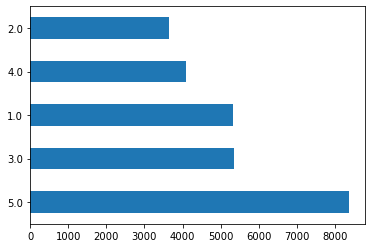

In [223]:
print(df['Rating'].value_counts())
df["Rating"].value_counts().plot(kind='barh')

In [123]:
from nltk.corpus import stopwords
# Stopwors 
stop = set(stopwords.words("english"))
stop.remove("shouldn't")
stop.remove("didn't")
stop.remove('not')
stop.remove("don't")
stop.remove("doesn't")

In [124]:
print(stop)

{'myself', 'wasn', 'won', 'isn', 'few', 'which', 'themselves', 'herself', 'this', 'i', 'their', 'nor', 'under', 'yours', 'aren', 'ours', 'too', 'ma', "needn't", "won't", 'yourself', 'more', 'mightn', "haven't", 'we', 'that', 'been', 'are', 'off', 'any', 'until', 'my', 'having', 'those', 'after', 'has', 'then', 'further', 'should', 'our', 'very', 'why', 'about', 'didn', 'does', 'his', 'each', "wouldn't", 'yourselves', 'do', 'being', 'than', 'weren', 'all', 'as', 'own', "you'll", 'against', 't', 'doesn', "shan't", 'theirs', 'down', "mustn't", 'were', 'here', "hadn't", 'wouldn', "she's", 'o', 'if', 'hasn', 'where', 'no', 'itself', 'd', 'shouldn', 'and', 'at', 'mustn', 'the', 'them', 'same', 'these', 'how', 'to', 'most', "wasn't", 'doing', 'during', 'of', 's', "you're", 'your', 'only', 'he', 'out', "should've", "that'll", 'an', 'have', "you'd", 'into', 'again', 'ain', 'needn', 'can', 'be', 've', 'in', 'there', 'she', 'hadn', "hasn't", 'from', 'its', "it's", 'ourselves', 'by', 'when', 'was'

In [125]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers,
#Url's HTML tages and punctuation
def text_clean_1(text):
    text = re.sub('[^a-zA-Z]', ' ', text)    #removing all except english letters 
    text = text.lower()                      #lower case 
    text = re.sub('\[.*?\]', '', text)       #sqare brackets removal  
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)   #Removing punctuation
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("https?://\S+|www\.\S+", '', text)                 # Removing Urls
    text = re.sub("<.*?>", '', text)                                #Removing HTMl Tags
    
    return text

cleaned1 = lambda x: text_clean_1(x)

In [126]:
df['Review'] = pd.DataFrame(df.Review.apply(cleaned1))
df['Review_title'] = pd.DataFrame(df.Review_title.apply(cleaned1))

df.head(10)

Review  Rating  \
0  extremely overpriced  at this price range we g...     1.0   
1      nits      why no     nits model are availa...     2.0   
2  this laptop i bought after intense search i fo...     5.0   
3  hii have purchased this model  legion  i intel...     5.0   
4  loved the laptop  got it for   k and i think i...     5.0   
5  update   i had promised to add an update once ...     4.0   
6  kindly note that people and reviewing without ...     5.0   
7  first of all i feel lucky for getting this lap...     5.0   
8  pros unlike rogs and msis of the world it s bu...     5.0   
9  specifications are good at this      rs pricep...     4.0   

                               Review_title  
0                                overpriced  
1                      overpriced manh       
2                 best gaming laptop ever    
3     if ur budget is around   k go for it   
4               legion  i  amazing product   
5                             honest review  
6            genuine review    from a gamer  
7  best non  gamery  looking gaming laptop   
8                a complete quality product  
9                       good at this price

In [127]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)
cleaned3 = lambda x: remove_emoji(x)

In [128]:
df['Review'] = pd.DataFrame(df.Review.apply(cleaned3))
df['Review_title'] = pd.DataFrame(df.Review_title.apply(cleaned3))

In [129]:
def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)
cleaned4 = lambda x: remove_punct(x)

In [130]:
df['Review'] = pd.DataFrame(df.Review.apply(cleaned4))
df['Review_title'] = pd.DataFrame(df.Review_title.apply(cleaned4))

In [131]:
#Remove special characters
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem
cleaned5 = lambda x: is_special(x)


In [132]:
df['Review'] = pd.DataFrame(df.Review.apply(cleaned5))
df['Review_title'] = pd.DataFrame(df.Review_title.apply(cleaned5))

In [133]:
df.head(10)

Review  Rating  \
0  extremely overpriced  at this price range we g...     1.0   
1      nits      why no     nits model are availa...     2.0   
2  this laptop i bought after intense search i fo...     5.0   
3  hii have purchased this model  legion  i intel...     5.0   
4  loved the laptop  got it for   k and i think i...     5.0   
5  update   i had promised to add an update once ...     4.0   
6  kindly note that people and reviewing without ...     5.0   
7  first of all i feel lucky for getting this lap...     5.0   
8  pros unlike rogs and msis of the world it s bu...     5.0   
9  specifications are good at this      rs pricep...     4.0   

                               Review_title  
0                                overpriced  
1                      overpriced manh       
2                 best gaming laptop ever    
3     if ur budget is around   k go for it   
4               legion  i  amazing product   
5                             honest review  
6            genuine review    from a gamer  
7  best non  gamery  looking gaming laptop   
8                a complete quality product  
9                       good at this price

In [134]:
mask = df['Review'].str.len() > 3

In [135]:
mask

0        True
1        True
2        True
3        True
4        True
         ... 
26773    True
26774    True
26775    True
26776    True
26777    True
Name: Review, Length: 26778, dtype: bool

In [136]:
df2 = df[mask].copy()

In [137]:
df2

Review  Rating  \
0      extremely overpriced  at this price range we g...     1.0   
1          nits      why no     nits model are availa...     2.0   
2      this laptop i bought after intense search i fo...     5.0   
3      hii have purchased this model  legion  i intel...     5.0   
4      loved the laptop  got it for   k and i think i...     5.0   
...                                                  ...     ...   
26773                      display quality is pathetic       2.0   
26774                                  sound is very low     2.0   
26775                      like i will doing watching tv     2.0   
26776  only for those who care about quality otherwis...     2.0   
26777     audio in monitor doesn t work   the brightn...     2.0   

                                Review_title  
0                                 overpriced  
1                       overpriced manh       
2                  best gaming laptop ever    
3      if ur budget is around   k go for it   
4                legion  i  amazing product   
...                                      ...  
26773                                display  
26774            picture quality is not good  
26775                                display  
26776      must read who care about quality   
26777                       not as explained  

[26667 rows x 3 columns]

In [138]:
from nltk.stem import WordNetLemmatizer
def Lem_txt(text):
    text = text.split()
    ls = WordNetLemmatizer()
    text = [ls.lemmatize(w) for w in text if w not in stop]
    text = " ".join(text)
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    return text

df2.Review = df2.Review.apply(Lem_txt)
df2.Review_title = df2.Review_title.apply(Lem_txt)

In [83]:
# Stemming

#def stem_txt(text):
    #ps = PorterStemmer()
    #text = [ps.stem(w) for w in text if w not in stop]
    #text = " ".join(text)
    
    #return text

#df2.Review = df2.Review.apply(stem_txt)
#df2.Review_title = df2.Review_title.apply(stem_txt)


In [189]:
#Removing columns with more than 500 words
mask = df3['Review'].str.len() < 500

In [190]:
df4 = df3[mask].copy()

In [220]:
df2 = df4

In [221]:
#Joining

def join(text):
    text = " ".join(text)
    return text

df2.Review = df2.Review.apply(join)
df2.Review_title = df2.Review_title.apply(join)

In [26]:
rating1 = df2.loc[df2['Rating'] == 1]
rating2 = df2.loc[df2['Rating'] == 2]
rating3 = df2.loc[df2['Rating'] == 3]
rating4 = df2.loc[df2['Rating'] == 4]
rating5 = df2.loc[df2['Rating'] == 5]

In [27]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [28]:
from collections import Counter
cloudn = Counter(" ".join(df2["Review"]).split()).most_common(100)
cloud1 = Counter(" ".join(rating1["Review_title"]).split()).most_common(100)
cloud2 = Counter(" ".join(rating2["Review_title"]).split()).most_common(100)
cloud3 = Counter(" ".join(rating3["Review_title"]).split()).most_common(100)
cloud4 = Counter(" ".join(rating4["Review_title"]).split()).most_common(100)
cloud5 = Counter(" ".join(rating5["Review_title"]).split()).most_common(100)

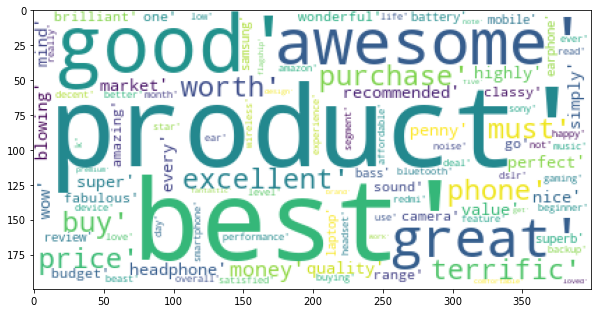

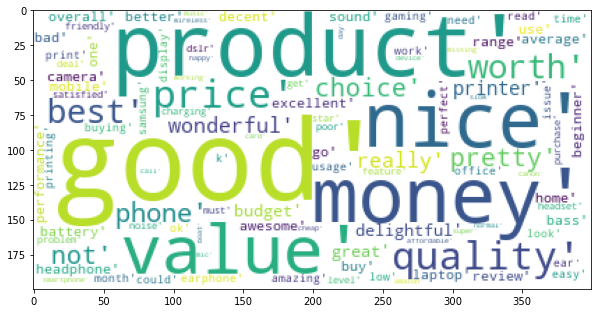

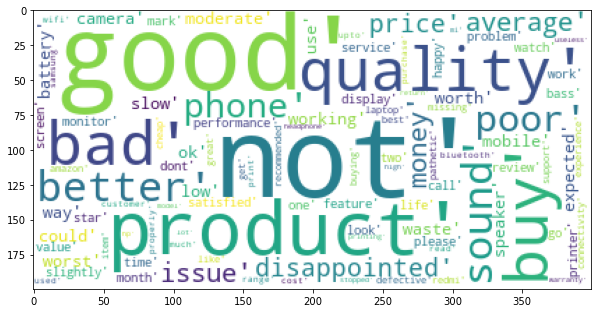

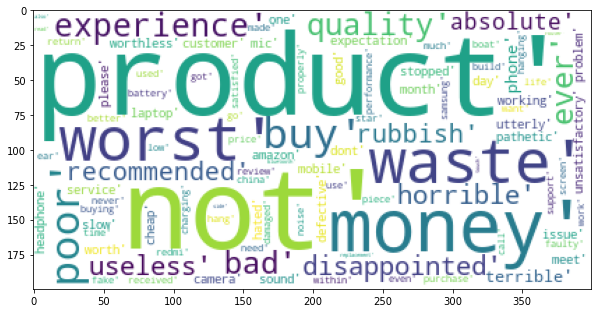

In [29]:
#5Star

plt.figure(figsize=(10, 8))
wordcloud5 = WordCloud(background_color="white", max_font_size=80 ).generate(str(cloud5))
plt.imshow(wordcloud5)

#4Star 
plt.figure(figsize=(10, 8))
wordcloud4 = WordCloud(background_color="white", max_font_size=80).generate(str(cloud4))
plt.imshow(wordcloud4)

plt.figure(figsize=(10, 8))
wordcloud3 = WordCloud(background_color="white", max_font_size=80).generate(str(cloud3))
plt.imshow(wordcloud3)

plt.figure(figsize=(10, 8))
wordcloud2 = WordCloud(background_color="white", max_font_size=80).generate(str(cloud2))
plt.imshow(wordcloud2)

plt.figure(figsize=(10, 8))
wordcloud1 = WordCloud(background_color="white", max_font_size=80).generate(str(cloud1))
plt.imshow(wordcloud1)

In [30]:
from nltk.util import ngrams
text = ' '.join(df2.loc[df2.Rating == 5, 'Review'].values)
text_trigrams = [i for i in ngrams(text.split(), 4)]

# Model Building

In [102]:
y1=df["Rating"]
#x1=df.drop("Rating", axis=1)

In [224]:
#y=np.array(df2["Rating"].values)
y = df2["Rating"].values
#x=np.array(df2.drop("Rating", axis=1).values)
x=df2.drop(["Rating"], axis=1)

In [225]:
cv = CountVectorizer(max_features = 50000)

In [226]:
x = cv.fit_transform(df2['Review']+' '+df2['Review_title'])
#x = cv.transform(df.Review_title)
print("x.shape = ",x.shape)
print("y.shape = ",y.shape)

x.shape =  (26652, 24028)
y.shape =  (26652,)


In [227]:
#tfidf = TfidfVectorizer(analyzer = 'char',max_features=50000, ngram_range = (1,3),lowercase = False)
tfidf = TfidfTransformer()

In [228]:
x = tfidf.fit_transform(x)

In [229]:
print(x[0])

  (0, 21342)	0.2855714347562025
  (0, 18283)	0.27092707239026625
  (0, 17087)	0.13653924780209803
  (0, 16058)	0.1106742187000648
  (0, 14787)	0.5397558209035741
  (0, 14369)	0.35844652391301113
  (0, 11814)	0.25947661702123004
  (0, 10015)	0.21175480087339807
  (0, 9223)	0.300382529659211
  (0, 8648)	0.13370990377448505
  (0, 7605)	0.19194285402295602
  (0, 7464)	0.22896676939448662
  (0, 5894)	0.25947661702123004
  (0, 2210)	0.13214879141977642


In [248]:
x.shape

(26652, 24028)

In [151]:
max_scr=0
for i in range(0,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    SVC.fit(x_train,y_train)
    pred_train=SVC.predict(x_train)
    pred_test=SVC.predict(x_test)
    #if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
    if accuracy_score(y_train,pred_train)*100>max_scr:  
        max_scr=accuracy_score(y_train,pred_train)*100
        print("At random state",i,"The model Perfomes very well")
        print("Training accuracy_score is:",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:",accuracy_score(y_test,pred_test), end = "\n\n\n")

At random state 0 The model Perfomes very well
Training accuracy_score is: 81.075
Testing accuracy_score is: 0.6569671516424179




In [236]:
#Train test split
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.25,random_state=8)
print("Train shapes : X = {}, y = {}".format(trainx.shape,trainy.shape))
print("Test shapes : X = {}, y = {}".format(testx.shape,testy.shape))

Train shapes : X = (19989, 24028), y = (19989,)
Test shapes : X = (6663, 24028), y = (6663,)


In [4]:
#from IPython import get_ipython
#get_ipython().magic('reset -sf') 

In [40]:

from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(analyzer = 'char',max_features=20000, ngram_range = (1,3),lowercase = False)
from sklearn.svm import LinearSVC
LinearSVC= LinearSVC(C=100)


from sklearn.pipeline import Pipeline

In [171]:
#LinearSVC
LinearSVC.fit(trainx,trainy)
LSVC = LinearSVC.predict(testx)
print(accuracy_score(testy, LSVC)*100 )
print(confusion_matrix(testy, LSVC))
print(classification_report(testy, LSVC))

56.757162141892906
[[ 944  169  119   58   37]
 [ 184  342  262   62   56]
 [ 136  260  632  175  124]
 [  38   93  204  376  310]
 [  50   83  159  304 1490]]
              precision    recall  f1-score   support

         1.0       0.70      0.71      0.70      1327
         2.0       0.36      0.38      0.37       906
         3.0       0.46      0.48      0.47      1327
         4.0       0.39      0.37      0.38      1021
         5.0       0.74      0.71      0.73      2086

    accuracy                           0.57      6667
   macro avg       0.53      0.53      0.53      6667
weighted avg       0.57      0.57      0.57      6667



In [272]:
#Defining the models and Training them
gnb,mnb,bnb = GaussianNB(),MultinomialNB(),BernoulliNB()

mnb = MultinomialNB(alpha=1.0,fit_prior=True)


gnb.fit(trainx,trainy)
bnb.fit(trainx,trainy)
mnb.fit(trainx,trainy)

MultinomialNB()

In [273]:
#Prediction and accuracy metrics to choose best model
ypg = gnb.predict(testx)
ypm = mnb.predict(testx)
ypb = bnb.predict(testx)

print("Gaussian    = ",   accuracy_score(testy,ypg))
print("Multinomial = ",   accuracy_score(testy,ypm))
print("Bernoulli   = ",   accuracy_score(testy,ypb))

Gaussian    =  0.29200896191187453
Multinomial =  0.59260642270351
Bernoulli   =  0.5491038088125467


In [264]:
mnb = MultinomialNB(alpha=1.0,fit_prior=True)

mnb.fit(trainx,trainy)
predictions = mnb.predict(testx)
print(accuracy_score(testy, predictions)*100 )
print(confusion_matrix(testy, predictions))
print(classification_report(testy, predictions))

61.967886482449586
[[ 877   14   96    2   52]
 [ 227   85  322   12   97]
 [ 124   33  642   29  236]
 [  28    6  159  138  501]
 [  21    0   62   16 1577]]
              precision    recall  f1-score   support

         1.0       0.69      0.84      0.76      1041
         2.0       0.62      0.11      0.19       743
         3.0       0.50      0.60      0.55      1064
         4.0       0.70      0.17      0.27       832
         5.0       0.64      0.94      0.76      1676

    accuracy                           0.62      5356
   macro avg       0.63      0.53      0.51      5356
weighted avg       0.63      0.62      0.56      5356



In [331]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
#param_grid = {'C': [1, 5, 7, 9, 10], 
              #'gamma': [1, 0.1, 0.01],
              #'kernel': ['rbf']} 
  
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
#grid.fit(trainx,trainy)

In [237]:
#SVC
from sklearn.svm import SVC
SVC = SVC(C=50,kernel = 'rbf', gamma = 0.01, random_state = 42)

SVC.fit(trainx,trainy)
SVCP = SVC.predict(testx)
print(accuracy_score(testy, SVCP)*100 )
print(confusion_matrix(testy, SVCP))
print(classification_report(testy, SVCP))

66.0063034669068
[[1036  106   89   12   17]
 [ 208  353  303   26   25]
 [ 105  202  779  149  112]
 [  19   27  199  427  373]
 [  14   19   98  162 1803]]
              precision    recall  f1-score   support

         1.0       0.75      0.82      0.78      1260
         2.0       0.50      0.39      0.44       915
         3.0       0.53      0.58      0.55      1347
         4.0       0.55      0.41      0.47      1045
         5.0       0.77      0.86      0.81      2096

    accuracy                           0.66      6663
   macro avg       0.62      0.61      0.61      6663
weighted avg       0.65      0.66      0.65      6663



In [246]:
# Creating a Pipeline of CountVectorizer, TfidfTransformer and SVC
finalmodel = Pipeline([('vectorizer1',cv),('vectorizer2',tfidf),('classifier',SVC)])

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
GBC= GradientBoostingClassifier(n_estimators = 1000,random_state=15)
GBC.fit(trainx,trainy)
GBCP = GBC.predict(testx)
print(accuracy_score(testy, GBCP)*100 )
print(confusion_matrix(testy, GBCP))
print(classification_report(testy, GBCP))


64.90175491225439
[[1004  124  106   20   33]
 [ 170  336  322   39   37]
 [  74  197  792  150  109]
 [  17   21  207  443  360]
 [  15   23  108  208 1752]]
              precision    recall  f1-score   support

         1.0       0.78      0.78      0.78      1287
         2.0       0.48      0.37      0.42       904
         3.0       0.52      0.60      0.55      1322
         4.0       0.52      0.42      0.46      1048
         5.0       0.76      0.83      0.80      2106

    accuracy                           0.65      6667
   macro avg       0.61      0.60      0.60      6667
weighted avg       0.64      0.65      0.64      6667



In [114]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(criterion= 'gini',max_features= 'sqrt', n_estimators = 1000)
RFC.fit(trainx,trainy)
predictions = RFC.predict(testx)
print(accuracy_score(testy, predictions)*100 )
print(confusion_matrix(testy, predictions))
print(classification_report(testy, predictions))

65.42672866356682
[[1110   22   89    3   63]
 [ 270  197  363   12   62]
 [ 132   63  866   54  207]
 [  37    6  193  241  571]
 [  31    2   72   53 1948]]
              precision    recall  f1-score   support

         1.0       0.70      0.86      0.77      1287
         2.0       0.68      0.22      0.33       904
         3.0       0.55      0.66      0.60      1322
         4.0       0.66      0.23      0.34      1048
         5.0       0.68      0.92      0.79      2106

    accuracy                           0.65      6667
   macro avg       0.66      0.58      0.57      6667
weighted avg       0.66      0.65      0.61      6667



In [115]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(n_jobs=1, C=1e5)           
logreg.fit(trainx,trainy)


y_pred = logreg.predict(testx)

print('accuracy %s' % accuracy_score(y_pred, testy))
print(confusion_matrix(testy, y_pred))
print(classification_report(testy, y_pred))

accuracy 0.6097195140242988
[[ 948  181  108   25   25]
 [ 150  380  286   51   37]
 [  91  286  673  150  122]
 [  23   53  223  420  329]
 [  17   33  131  281 1644]]
              precision    recall  f1-score   support

         1.0       0.77      0.74      0.75      1287
         2.0       0.41      0.42      0.41       904
         3.0       0.47      0.51      0.49      1322
         4.0       0.45      0.40      0.43      1048
         5.0       0.76      0.78      0.77      2106

    accuracy                           0.61      6667
   macro avg       0.57      0.57      0.57      6667
weighted avg       0.61      0.61      0.61      6667



In [116]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-2, random_state=42, max_iter=10, tol=None)           
sgd.fit(trainx,trainy)


y_pred = sgd.predict(testx)

print('accuracy %s' % accuracy_score(y_pred, testy))
print(confusion_matrix(testy, y_pred))
print(classification_report(testy, y_pred))

accuracy 0.5657717114144293
[[1137   10   25    2  113]
 [ 423   42  200   27  212]
 [ 267   31  433   65  526]
 [  41    7   84  116  800]
 [  26    2   23   11 2044]]
              precision    recall  f1-score   support

         1.0       0.60      0.88      0.71      1287
         2.0       0.46      0.05      0.08       904
         3.0       0.57      0.33      0.41      1322
         4.0       0.52      0.11      0.18      1048
         5.0       0.55      0.97      0.70      2106

    accuracy                           0.57      6667
   macro avg       0.54      0.47      0.42      6667
weighted avg       0.55      0.57      0.48      6667



# Neural Network

In [160]:
df41 = df4

In [60]:
import keras
import keras.utils
from keras.utils.np_utils import to_categorical
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from tqdm import tqdm
from tensorflow.keras.layers import Bidirectional

In [161]:
def split(text):
    text = text.split()     #Spliting strings into list
    return text
df3.Review = df3.Review.apply(split)
df3.Review_title = df3.Review_title.apply(split)

In [203]:

target=df41.Rating.values
y_target=to_categorical(target)   # Converting labels int categorical values 
num_classes=y_target.shape[1]

In [204]:
x1= df41['Review']

In [205]:
x1

0        [extremely, overpriced, price, range, get, hp,...
1        [nit, nit, model, available, team, lenovo, nit...
2        [laptop, bought, intense, search, found, best,...
3        [hii, purchased, model, legion, intel, th, gen...
4        [loved, laptop, got, think, worth, every, rupe...
                               ...                        
26773                         [display, quality, pathetic]
26774                                         [sound, low]
26775                                 [like, watching, tv]
26776    [care, quality, otherwise, good, product, buil...
26777    [audio, monitor, work, brightness, adjusted, b...
Name: Review, Length: 26652, dtype: object

In [206]:
#Splitting the data
X_train,X_val,y_train,y_val=train_test_split(x1,y_target,test_size=0.25,stratify=y_target)

In [207]:
X_train

21406                                      [good, product]
10992    [given, star, bcoz, seller, amazon, delivery, ...
1935     [good, phone, amazon, lowest, price, varient, ...
16018                                       [good, camera]
3604     [smooth, totally, worth, offer, lot, feature, ...
                               ...                        
6515     [really, nice, headphone, got, issue, sound, v...
2628     [product, processer, ye, slow, camra, quality,...
4012     [far, issue, regarding, producr, quality, deli...
11118    [far, issue, working, great, print, side, wish...
11703    [would, suggest, anyone, looking, printer, com...
Name: Review, Length: 19989, dtype: object

In [208]:
#Getting unique words and max length of the string

unique_words = set()
len_max = 0

for sent in tqdm(x1):
    
    unique_words.update(sent)
    
    if(len_max<len(sent)):
        len_max = len(sent)
        
#length of the list of unique_words gives the no of unique words
print(len(list(unique_words)))
print(len_max)

100%|████████████████████████████████████████████████████████████████████████| 26652/26652 [00:00<00:00, 476125.25it/s]

23385
491


In [50]:
unique_words

{'attitude',
 'firnt',
 'bettercamera',
 'crome',
 'plzzz',
 'widely',
 'exmpl',
 'overdrive',
 'muje',
 'drainat',
 'principle',
 'goodphone',
 'connnect',
 'agreed',
 'reviewwhats',
 'nicelycons',
 'surprosed',
 'vizag',
 'spotify',
 'inserting',
 'slightly',
 'emptied',
 'rbg',
 'sensorsuper',
 'flawlesslymic',
 'cover',
 'priceblurness',
 'rsthanks',
 'enjoyable',
 'simpler',
 'interfere',
 'receivable',
 'platform',
 'psu',
 'bug',
 'starsn',
 'wee',
 'heavybattery',
 'ksound',
 'capicity',
 'chemra',
 'tooooooo',
 'usbs',
 'qickly',
 'skewed',
 'greeting',
 'irritable',
 'citibank',
 'drink',
 'assault',
 'moving',
 'klzp',
 'notorious',
 'laptopbattery',
 'granny',
 'persisted',
 'chanced',
 'defectedgood',
 'assignment',
 'waer',
 'proi',
 'dissapoint',
 'chargingcons',
 'diagonal',
 'begun',
 'replacei',
 'soche',
 'lound',
 'whle',
 'haiisme',
 'nxt',
 'splurge',
 'finesleep',
 'making',
 'sahi',
 'burnt',
 'yous',
 'blaster',
 'alwaysthe',
 'fewer',
 'contineusly',
 'explore

In [209]:
tokenizer = Tokenizer(num_words=len(list(unique_words)))
tokenizer.fit_on_texts(x1)


# Arguments- texts: list of texts to turn to sequences.
#Return: list of sequences (one per text input).
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)


#padding done to equalize the lengths of all input reviews. LSTM networks needs all inputs to be same length.
#Therefore reviews lesser than max length will be made equal using extra zeros at end. This is padding.

X_train = sequence.pad_sequences(X_train, maxlen=len_max)
X_val = sequence.pad_sequences(X_val, maxlen=len_max)


print(X_train.shape,X_val.shape)

(19989, 491) (6663, 491)


In [53]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]

In [55]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [210]:
len_max

491

In [211]:
X_train

array([[   0,    0,    0, ...,    0,    1,    3],
       [   0,    0,    0, ...,    1,    7,  312],
       [   0,    0,    0, ...,  397,   11,    1],
       ...,
       [   0,    0,    0, ..., 1499,  243, 8226],
       [   0,    0,    0, ..., 1865,   10,   28],
       [   0,    0,    0, ...,  924,  225, 9577]])

In [218]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(23385,embedding_vector_features,input_length=491))
model.add(LSTM(200))
model.add(Dense(num_classes,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 491, 40)           935400    
_________________________________________________________________
lstm_18 (LSTM)               (None, 200)               192800    
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1206      
Total params: 1,129,406
Trainable params: 1,129,406
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model = models.Sequential()
model.add( Dense(64, activation="relu", input_shape = (491,) ) )
model.add( Dense(32, activation="relu") )
model.add( Dense(16, activation="relu") )
model.add( Dense(num_classes, activation="softmax"))
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

In [219]:
#Fitting the model to the data
hist = model.fit(X_train, y_train, batch_size=128, epochs=8, validation_data=(X_val, y_val))

Epoch 1/8
157/157 [==============================] - 387s 2s/step - loss: 1.5714 - accuracy: 0.3271 - val_loss: 1.1665 - val_accuracy: 0.5280
Epoch 2/8
157/157 [==============================] - 382s 2s/step - loss: 1.0857 - accuracy: 0.5581 - val_loss: 1.1634 - val_accuracy: 0.5352
Epoch 3/8
157/157 [==============================] - 381s 2s/step - loss: 0.9728 - accuracy: 0.6104 - val_loss: 1.0693 - val_accuracy: 0.5619
Epoch 4/8
157/157 [==============================] - 415s 3s/step - loss: 0.8715 - accuracy: 0.6515 - val_loss: 1.1042 - val_accuracy: 0.5580
Epoch 5/8
157/157 [==============================] - 441s 3s/step - loss: 0.8040 - accuracy: 0.6902 - val_loss: 1.1407 - val_accuracy: 0.5616
Epoch 6/8
157/157 [==============================] - 442s 3s/step - loss: 0.7327 - accuracy: 0.7208 - val_loss: 1.1945 - val_accuracy: 0.5541
Epoch 7/8
157/157 [==============================] - 395s 3s/step - loss: 0.6692 - accuracy: 0.7564 - val_loss: 1.2394 - val_accuracy: 0.5445
Epoch 

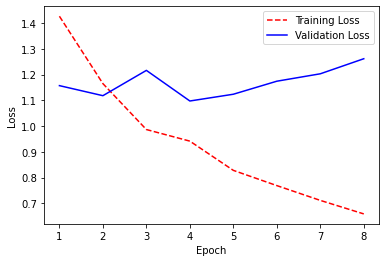

In [78]:
# Create count of the number of epochs
epoch_count = range(1, len(hist.history['loss']) + 1)

# Visualize learning curve. Here learning curve is not ideal. It should be much smoother as it decreases.

plt.plot(epoch_count, hist.history['loss'], 'r--')
plt.plot(epoch_count, hist.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [79]:
# Create count of the number of epochs
epoch_count = range(1, len(hist.history['accuracy']) + 1)

# Visualize learning curve. Here learning curve is not ideal. It should be much smoother as it decreases.

plt.plot(epoch_count, hist.history['accuracy'], 'r--')
plt.plot(epoch_count, hist.history['val_accuracy'], 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
Saving the model 

In [247]:
import pickle
filename="SVCReviewRating.pkl"
pickle.dump(finalmodel,open(filename,"wb"))

In [239]:
fit_model=pickle.load(open("SVCReviewRating.pkl","rb"))